In [436]:
import jax
import jax.numpy as jnp
from jax import grad, jit, vmap
import matplotlib.pyplot as plt
from generate import Generate_points
from generate_functions import generate_function, generate_f
from PINN import *

In [438]:
def err(y, y_hat):
    return jnp.mean((y - y_hat.T)**2)

In [440]:
# Some numbers
number_of_datapoints = 2000
number_of_nodes = round(1 / 8 * jnp.sqrt(number_of_datapoints))
K = number_of_nodes
J = number_of_datapoints
x_boundaries = [0, 2 * jnp.pi]
key_number = 42
evaluation_points = 200
noise = 0
dimension = 1

In [442]:
# Generate data
u = lambda t : jnp.cos(t) # + jnp.exp(0.1 * jnp.cos(10*t) + jnp.cos(t))
u = generate_function(u)
f = generate_f(u)

gn = Generate_points(f, u, number_of_nodes, number_of_datapoints, x_boundaries, key_number, evaluation_points, noise, dimension)
w, b, x, y, x_eval, y_eval = gn.generate()

#
x_eval = jnp.linspace(0, 2 * jnp.pi, 1000)[None, :]
y_eval = u(x_eval)

#Gives MUCH BETTER solution
x = jnp.linspace(0, 2* jnp.pi, J)[None, :]
y = jax.vmap(f)(x.flatten())[None, :]

key = gn.key

In [443]:
error = []
N = 15 #16#17
#js = 2**jnp.arange(7, N+1)
js = 2 ** jnp.arange(N+1,7,-1)
err = []

In [446]:
import numpy as np

In [450]:
x_eval = jnp.linspace(0, 2 * jnp.pi, 1000)[None, :]
y_eval = u(x_eval)
error_for_js = []
for j in js:
    error_term = 0
    if j >= 65536:
        number_of_runs = 30
    elif j>= 16384:
        number_of_runs = 30
    else:
        number_of_runs = 30
    error_in_runs = []
    for i in range(number_of_runs):
        number_of_datapoints = j
        number_of_nodes = round(1/4 * jnp.sqrt(number_of_datapoints))
        print("Running for nodes = ", number_of_nodes)
        k = number_of_nodes
        #Borde göra random key number varje gång!
        random_number = np.random.randint(1, 10000000)
        gn = Generate_points(f, u, number_of_nodes, number_of_datapoints, x_boundaries, key_number + random_number, evaluation_points, noise, dimension)
        w, b, x, y, x_eval, y_eval = gn.generate()
        key = gn.key
        scale = 1 / (2 *j)
        reg = 0.1 * k * j **(-1/2)
        delta = 1
        
        w_new, b_new, err = update(w,b,f,x,100,key,scale,reg,1,delta, x_eval, y_eval, number_of_nodes)
        y_test = forward(w_new,b_new,x_eval)
        mse = jnp.mean((y_eval- y_test.T)**2)
        error_in_runs.append(mse)
        error_term += mse
        print("J = ", j, " run ", i, "/" ,number_of_runs," completed")
        print("Error on run: ", mse)
        
    error_for_js.append(error_in_runs)
    error_term = error_term / number_of_runs
    print("J = ", j, "completed")
    error.append(error_term)


print("completed")

Running for nodes =  64
J =  65536  run  0 / 30  completed
Error on run:  4.3127086e-05
Running for nodes =  64
J =  65536  run  1 / 30  completed
Error on run:  9.983096e-06
Running for nodes =  64
J =  65536  run  2 / 30  completed
Error on run:  4.3818178e-05
Running for nodes =  64
J =  65536  run  3 / 30  completed
Error on run:  8.622472e-05
Running for nodes =  64
J =  65536  run  4 / 30  completed
Error on run:  3.4767243e-05
Running for nodes =  64
J =  65536  run  5 / 30  completed
Error on run:  0.00013996544
Running for nodes =  64
J =  65536  run  6 / 30  completed
Error on run:  2.2604832e-05
Running for nodes =  64
J =  65536  run  7 / 30  completed
Error on run:  2.1941178e-05
Running for nodes =  64
J =  65536  run  8 / 30  completed
Error on run:  4.803288e-05
Running for nodes =  64
J =  65536  run  9 / 30  completed
Error on run:  2.3702341e-05
Running for nodes =  64
J =  65536  run  10 / 30  completed
Error on run:  1.8362578e-05
Running for nodes =  64
J =  65536

In [419]:
max_vec = np.max(error_for_js, axis=1)
min_vec = np.min(error_for_js, axis=1)

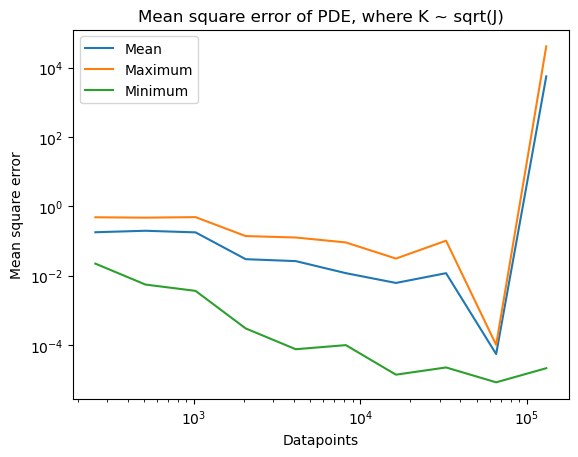

In [420]:
plt.loglog(js, error, label = "Mean")
plt.loglog(js, max_vec, label = "Maximum")
plt.loglog(js, min_vec, label = "Minimum")
plt.ylabel("Mean square error")
plt.xlabel("Datapoints")
plt.title("Mean square error of PDE, where K ~ sqrt(J)")
plt.legend()
plt.savefig('my_plot.png')
plt.show()

In [ ]:
np.save("list_of_mean_errors_ver2.txt", error)
np.save("list_of_all_errors_per_run_ver2.txt", error_for_js)

In [370]:
number_of_datapoints = j
number_of_nodes = round(1/4 * jnp.sqrt(number_of_datapoints))
print("Nodes:", number_of_nodes)
k = number_of_nodes
random_number = np.random.randint(1, 10000000)
gn = Generate_points(f, u, number_of_nodes, number_of_datapoints, x_boundaries, key_number + random_number, evaluation_points, noise, dimension)
w, b, x, y, x_eval, y_eval = gn.generate()
key = gn.key
scale = 1 / (2 *j)
reg = 0.1 * k * j **(-1/2)
delta = 1
w_new, b_new, err = update(w,b,f,x,100,key,scale,reg,1,delta, x_eval, y_eval, number_of_nodes)
y_test = forward(w_new,b_new,x_eval)

Nodes: 91


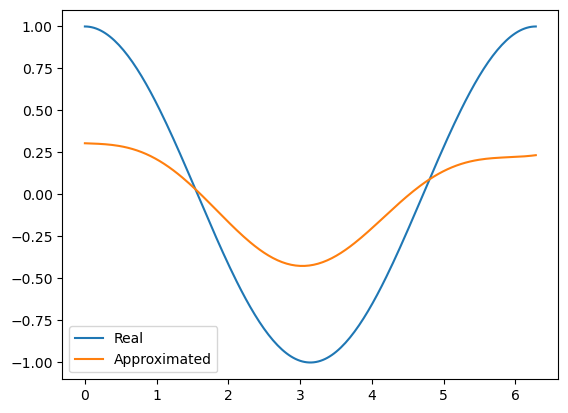

In [412]:
plt.plot(x_eval.flatten(), y_eval.flatten(), label = "Real")
plt.plot(x_eval.flatten(), y_test.flatten(), label = "Approximated")
plt.legend()
plt.show()

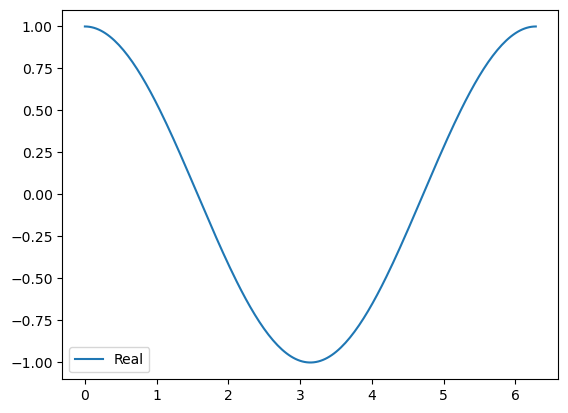

In [392]:
u = lambda t : jnp.cos(t)
u = generate_function(u)
f = generate_f(u)

gn = Generate_points(f, u, number_of_nodes, number_of_datapoints, x_boundaries, key_number, evaluation_points, noise, dimension)
w, b, x, y, x_eval, y_eval = gn.generate()
plt.plot(x_eval.flatten(), y_eval.flatten(), label = "Real")
plt.legend()
plt.show()